In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

pumpkins = pd.read_csv("C:/Users/HP/Downloads/US-pumpkins.csv")
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [2]:
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]
columns_to_select = ['City Name', 'Package', 'Variety', 'Date', 'Low Price', 'High Price']
pumpkins = pumpkins.loc[:, columns_to_select]

In [3]:
price = (pumpkins['High Price'] + pumpkins['Low Price']) / 2
month = pd.DatetimeIndex(pumpkins.Date).month
DayOfYear = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)

C:\Users\HP\AppData\Local\Temp\ipykernel_11920\2445721892.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  DayOfYear = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)


In [4]:
new_pumpkins = pd.DataFrame({'Month': month, 'Price': price, 'Date': DayOfYear, 'City': pumpkins['City Name'], 'Package': pumpkins['Package'], 'Variety': pumpkins['Variety']})

In [5]:
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/1.1
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price*2
new_pumpkins.head()


,Month,Price,Date,City,Package,Variety
70,9,13.636364,267,BALTIMORE,1 1/9 bushel cartons,PIE TYPE
71,9,16.363636,267,BALTIMORE,1 1/9 bushel cartons,PIE TYPE
72,10,16.363636,274,BALTIMORE,1 1/9 bushel cartons,PIE TYPE
73,10,15.454545,274,BALTIMORE,1 1/9 bushel cartons,PIE TYPE
74,10,13.636364,281,BALTIMORE,1 1/9 bushel cartons,PIE TYPE


C:\Users\HP\AppData\Local\Temp\ipykernel_11920\393234462.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


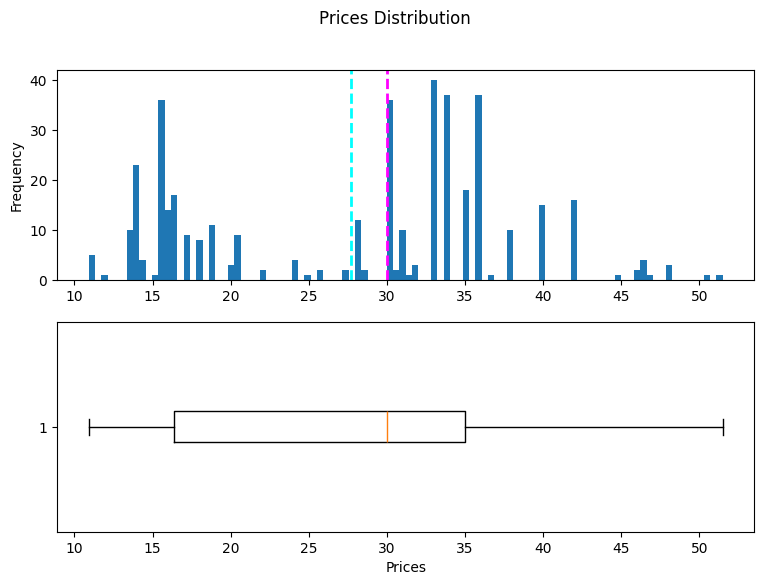

In [6]:
label = new_pumpkins['Price']
fig, ax = plt.subplots(2,1,figsize=(9, 6))
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')
ax[0].axvline(x=label.mean(), color='cyan', linestyle='dashed', linewidth=2)
ax[0].axvline(x=label.median(), color='magenta', linestyle='dashed', linewidth=2)
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Prices')
plt.suptitle('Prices Distribution')
fig.show()

<function matplotlib.pyplot.show(close=None, block=None)>

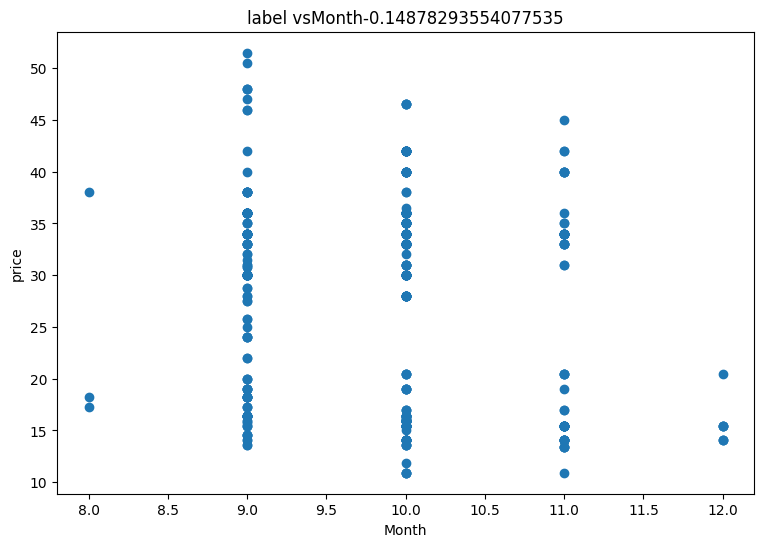

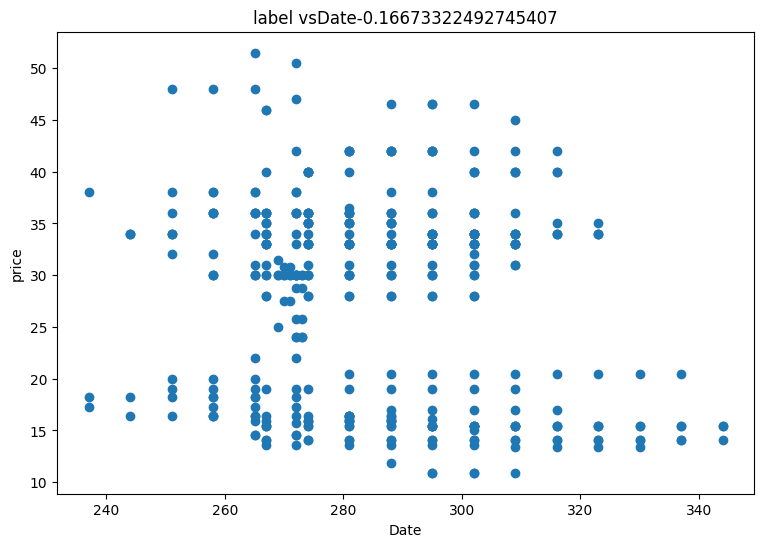

In [12]:
numeric_features = ['Month', 'Date']
for col in numeric_features:
    feature = new_pumpkins[col]
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('price')
    plt.title('label vs' + col + str(correlation))
plt.show

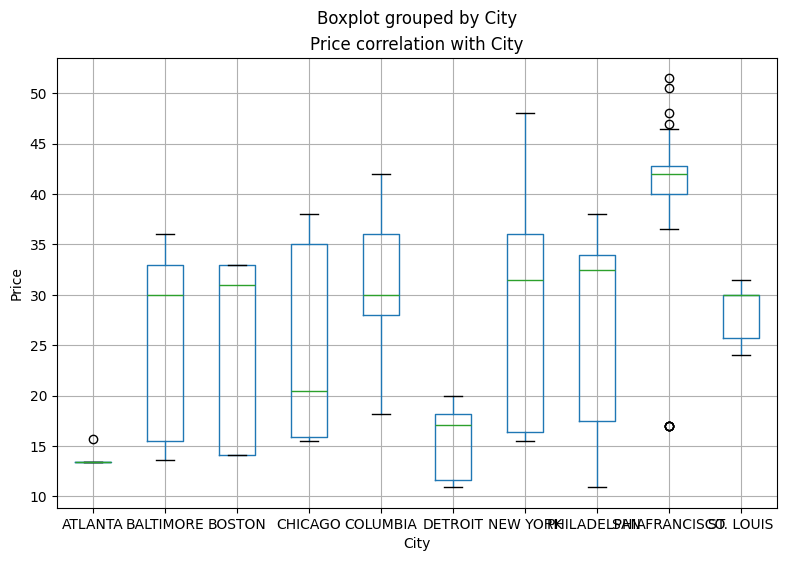

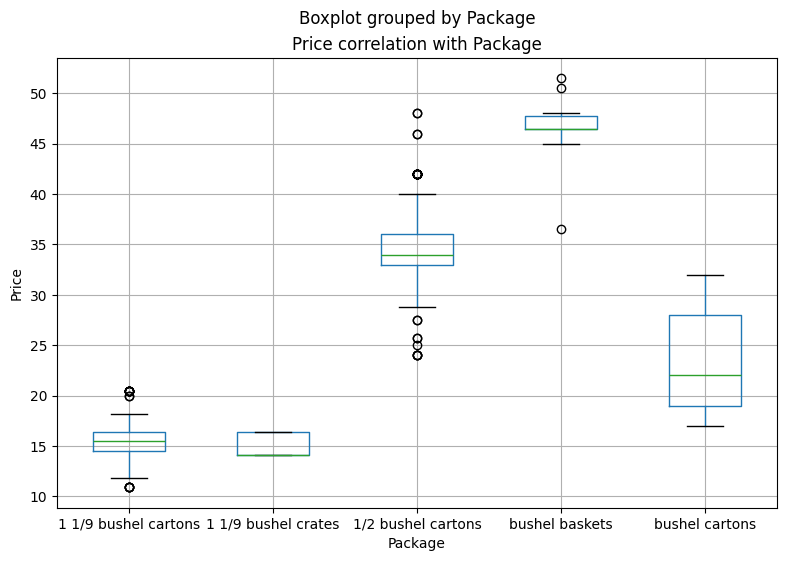

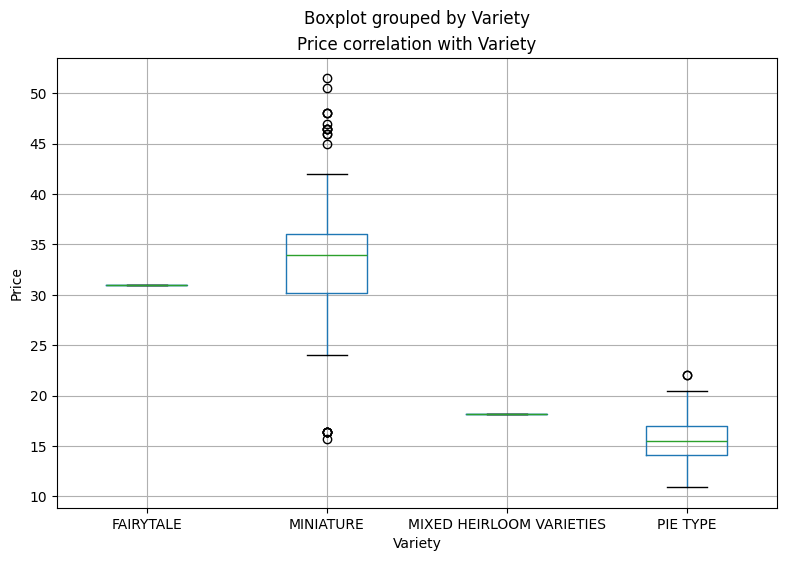

In [15]:
categorical_features = ['City', 'Package', 'Variety']
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    new_pumpkins.boxplot(column='Price', by=col, ax=ax)
    ax.set_title('Price correlation with ' + col)
    ax.set_ylabel('Price')
plt.show()


In [16]:
x,y = new_pumpkins[['Month', 'Date', 'City', 'Package', 'Variety']].values, new_pumpkins['Price'].values

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [21]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

numeric_features = [0, 1]
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_features = [2, 3, 4]
categorical_transformer = Pipeline(steps=[('onehotencoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),
                                                ('cat', categorical_transformer, categorical_features)])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                            ('Regression', RandomForestRegressor())])

model = pipeline.fit(x_train, (y_train))
print(model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [2, 3, 4])])),
                ('Regression', RandomForestRegressor())])


MSE:  5.254512023341695
RMSE:  2.2922722402327556
R2:  0.9531481233628949


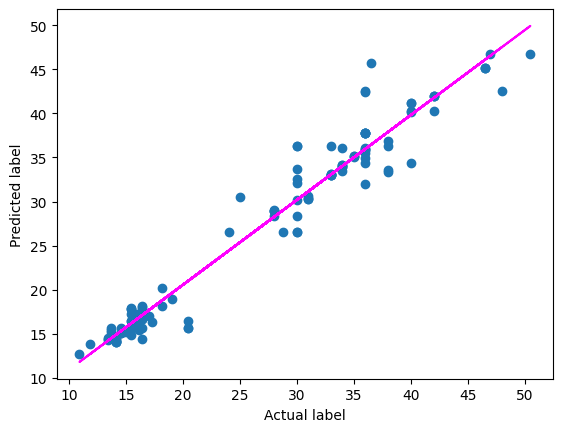

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
prediction = model.predict(x_test)
mse = mean_squared_error(y_test, prediction)
print('MSE: ', mse)
rmse = np.sqrt(mse)
print("RMSE: ", rmse)
r2 = r2_score(y_test, prediction)
print('R2: ', r2)

plt.scatter(y_test, prediction)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')

z = np.polyfit(y_test, prediction, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='magenta')
plt.show()